# This is the script for Data Preprocessing

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Changing the directory to where the files are stores

In [99]:
os.chdir('C:\Users\Artin\Google Drive\Courses\Semester 3\EC503 - Learning From Data\Project\King County Data')
all_data = pd.read_csv('kc_house_data.csv')

In [100]:
all_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [101]:
all_data.shape

(21613, 21)

In [102]:
all_data.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

Although zipcode is represented as a number, it is a categorical feature and doesn't necessarily have a linear relation with the price.

In [103]:
zip_str = [str(z) for z in all_data.zipcode]
all_data['zip_str']= zip_str

In [104]:
all_data['date'] = pd.to_datetime(all_data['date'])
all_data['date_yr'] = all_data['date'].dt.year

all_data['Life'] = all_data['date_yr'] - all_data['yr_built']
all_data['renovated'] = np.where(all_data['yr_renovated']!=0 ,1 ,0)

The features 'id', 'date', 'zipcode', 'lat', 'long' don't have linear relation with the house price and will be removed.

In [105]:
all_data = all_data.drop(['id','date', 'zipcode', 'yr_built','lat','long','date_yr','yr_renovated'], axis = 1)

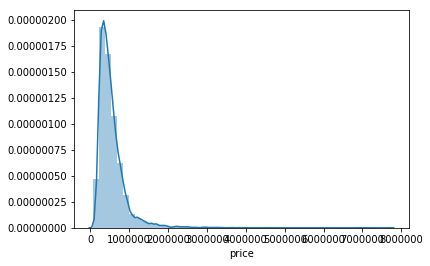

In [106]:
sns.distplot(all_data.price)
plt.savefig('price.png',bbox_inches = 'tight')

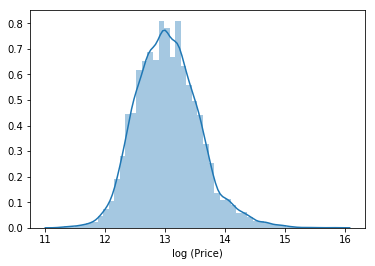

In [107]:
sns.distplot(np.log1p(all_data.price))
plt.xlabel('log (Price)')
plt.savefig('logprice.png',bbox_inches = 'tight')

Taking log of the skewed numerical features for them to have a normal distribution.

In [108]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [109]:
scaler = MinMaxScaler()
for column in numeric_feats:
    all_data[column] = scaler.fit_transform(np.reshape(all_data[column],(-1,1)))

Checking if there is any missing data.

In [110]:
all_data.isnull().sum().sum()

0L

Converting Categorical features to 0-1 vectors.

In [111]:
all_data = pd.get_dummies(all_data)

Splitting the whole data to training and test data.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(all_data.drop('price',1), all_data['price'], test_size=0.33, random_state=42)

about 14k training points, 85 features, and about 7k test points

In [113]:
X_train.shape, X_test.shape

((14480, 85), (7133, 85))

Saving the data into csv files

In [114]:
X_train.to_csv('X_train_scaled.csv',index=False, header = True)
y_train.to_csv('y_train_scaled.csv',index=False, header = True)
X_test.to_csv('X_test_scaled.csv',index=False, header = True)
y_test.to_csv('y_test_scaled.csv',index=False, header = True)